In [1]:
import pandas as pd

import numpy as np 

from fbprophet import Prophet

import matplotlib.pyplot as plt

from datetime import date

pd.plotting.register_matplotlib_converters()

# Número de casos no mundo

In [2]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
casos.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,11,18
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,4
247,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,71,86,91
248,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
249,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
250,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
casosMundo = np.sum(casos.iloc[:,4:casos.shape[1]])
casosMundo.index = pd.DatetimeIndex(casosMundo.index)
casosMundo.tail(10)

2020-03-19    242500
2020-03-20    272035
2020-03-21    304396
2020-03-22    336953
2020-03-23    378235
2020-03-24    418045
2020-03-25    467653
2020-03-26    529591
2020-03-27    593291
2020-03-28    660706
dtype: int64

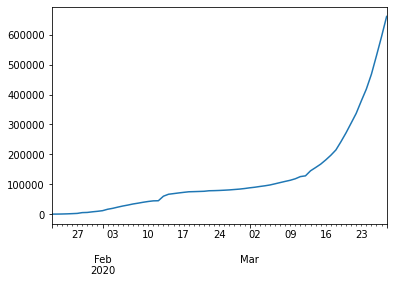

In [4]:
casosMundo.plot()

# Número de mortes

In [5]:
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
mortes.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
248,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mortesMundo = np.sum(mortes.iloc[:,4:mortes.shape[1]])
mortesMundo.index = pd.DatetimeIndex(mortesMundo.index)
mortesMundo.tail(10)

2020-03-19     9867
2020-03-20    11299
2020-03-21    12973
2020-03-22    14651
2020-03-23    16505
2020-03-24    18625
2020-03-25    21181
2020-03-26    23970
2020-03-27    27198
2020-03-28    30652
dtype: int64

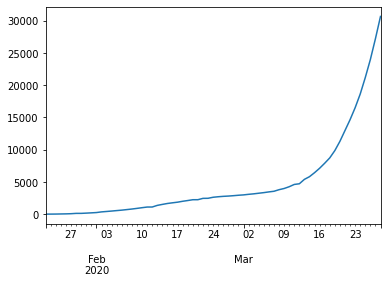

In [7]:
mortesMundo.plot()

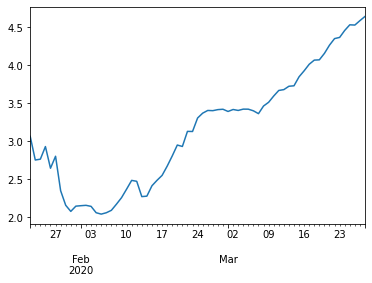

In [8]:
mortalidade = 100*(mortesMundo/casosMundo)
mortalidade.plot()

# Número de recuperações

In [9]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recuperados.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
229,NaN,Zambia,-15.416700,28.283300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,NaN,Zimbabwe,-20.000000,30.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,17,17,17,17,17,17,17,17,18
232,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
234,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
recuperadosMundo = np.sum(recuperados.iloc[:,4:recuperados.shape[1]])
recuperadosMundo.index = pd.DatetimeIndex(recuperadosMundo.index)
recuperadosMundo.tail(10)

2020-03-19     84975
2020-03-20     87420
2020-03-21     91692
2020-03-22     97899
2020-03-23     98351
2020-03-24    108000
2020-03-25    113787
2020-03-26    122150
2020-03-27    130915
2020-03-28    139415
dtype: int64

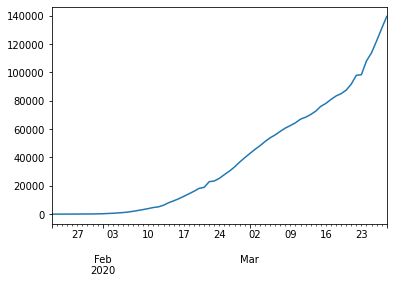

In [11]:
recuperadosMundo.plot()

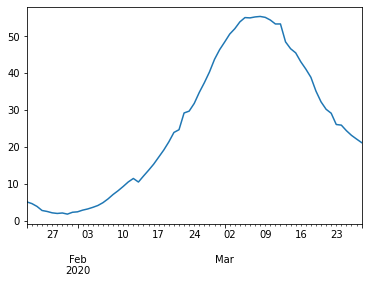

In [12]:
taxaRecuperacao = 100*(recuperadosMundo/casosMundo)
taxaRecuperacao.plot()

# Número de ativos

In [13]:
ativosMundo = casosMundo - (mortesMundo + recuperadosMundo)
ativosMundo.tail(10)

2020-03-19    147658
2020-03-20    173316
2020-03-21    199731
2020-03-22    224403
2020-03-23    263379
2020-03-24    291420
2020-03-25    332685
2020-03-26    383471
2020-03-27    435178
2020-03-28    490639
dtype: int64

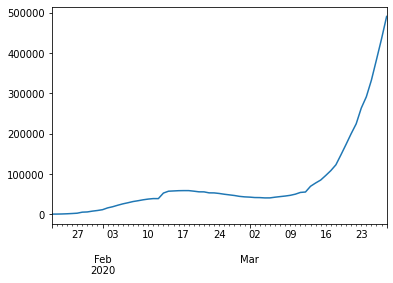

In [14]:
ativosMundo.plot()

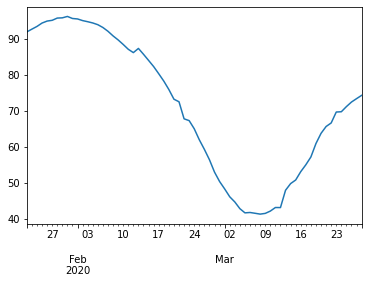

In [15]:
porcentagemAtivos = 100 - (mortalidade + taxaRecuperacao)
porcentagemAtivos.plot()

# Bases de dado unificada - Mundo

In [16]:
df_mundo = pd.concat([casosMundo,ativosMundo,recuperadosMundo,mortesMundo],axis=1)
df_mundo.columns = (['Casos','Ativos','Recuperados','Mortes'])
df_mundo.tail(10)

,Casos,Ativos,Recuperados,Mortes
2020-03-19,242500,147658,84975,9867
2020-03-20,272035,173316,87420,11299
2020-03-21,304396,199731,91692,12973
2020-03-22,336953,224403,97899,14651
2020-03-23,378235,263379,98351,16505
2020-03-24,418045,291420,108000,18625
2020-03-25,467653,332685,113787,21181
2020-03-26,529591,383471,122150,23970
2020-03-27,593291,435178,130915,27198
2020-03-28,660706,490639,139415,30652


In [17]:
casosMundo.shape

(67,)

In [18]:
ativosMundo.shape

(67,)

In [19]:
recuperadosMundo.shape

(67,)

In [20]:
mortesMundo.shape

(67,)

Text(0.5, 0, 'Data')

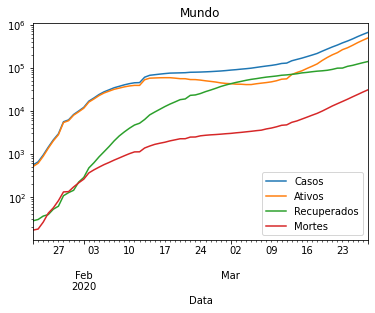

In [21]:
fig1 = df_mundo.plot(logy=True,title = 'Mundo')
fig1.set_xlabel('Data')

# Previsões - *Prophet*

In [22]:
def preProcess(country):
    
    nDays = casos[casos['Country/Region'] == country].iloc[:,4:casos.shape[1]].shape[1]
    
    d = {'Days':np.array(casos[casos['Country/Region'] == country].iloc[:,4:casos.shape[1]].columns),
         'Cases':np.sum(casos[casos['Country/Region'] == country].iloc[:,4:casos.shape[1]]),
         'Deaths':np.sum(mortes[mortes['Country/Region'] == country].iloc[:,4:mortes.shape[1]]),
         #Recovered':np.sum(recuperados[recuperados['Country/Region'] == country].iloc[:,4:recuperados.shape[1]])
        }

    df_country = pd.DataFrame(data=d)
    
    df_country=df_country[df_country['Cases']>100]
    
    return df_country

In [23]:
def prediction(df,predictionDays):
    originalNames = df.columns.values
    df.columns = ['ds','y']
    df['ds'] = pd.to_datetime(df['ds'])
    
    m = Prophet(interval_width=0.95)
    m.fit(df)
    future = m.make_future_dataframe(periods=predictionDays)
    pred = m.predict(future)
    
    df.columns = originalNames
    
    return m,pred

In [24]:
def trend(country,var,predictionDays):
    
    df_country = preProcess(country)
    
    df = df_country[['Days',var]]
    
    m, pred = prediction(df,predictionDays)
    
    plt.figure(figsize=(12,8))
    plt.fill_between(pred['ds'],pred['yhat_lower'],pred['yhat_upper'],alpha = 0.2)
    plt.plot(pred['ds'],pred['yhat'],label='Model')
    plt.plot(df['Days'],df[var],'.k',label=country)
    #plt.ylim(1e02,1e05)
    plt.yscale('log')
    plt.legend(fontsize=16)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.xlabel('Days since the first 100 cases',fontsize=16)
    plt.title('Accumulated '+var+' ('+date.today().strftime("%B %d, %Y")+')'+'\n'+'Estimating next '+str(predictionDays)+ ' days',fontsize=18)
    plt.tight_layout()
    plt.savefig('covid19Results/estimating'+var+country+str(predictionDays)+'Days.jpeg')
    
    return df_country, m, pred

/home/labcfd/omega/rituaali/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


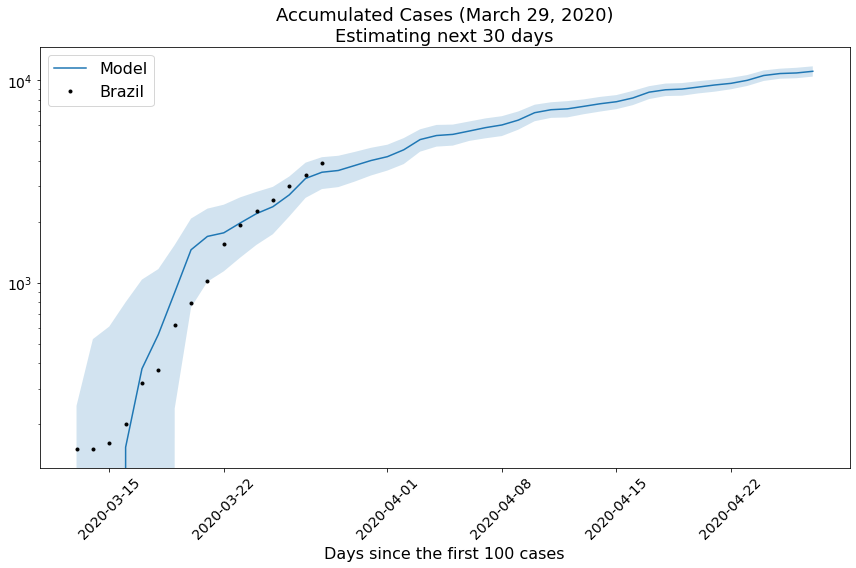

In [32]:
country = 'Brazil'
var='Cases'
predictionDays = 30

df_country, m, pred = trend(country,var,predictionDays)

/home/labcfd/omega/rituaali/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


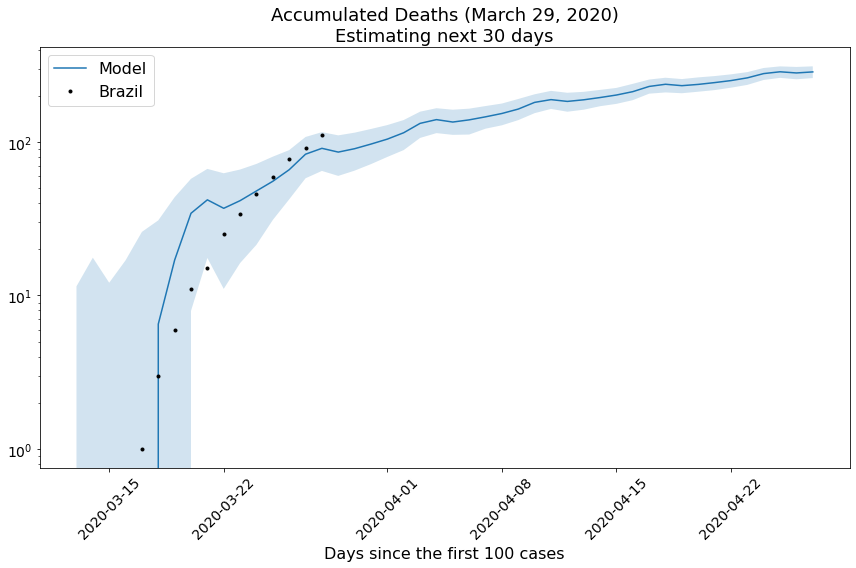

In [31]:
country = 'Brazil'
var='Deaths'
predictionDays = 30

df_country, m, pred = trend(country,var,predictionDays)

# Comparando países

In [27]:
def deltaT(df):
    df['Days'] = pd.to_datetime(df['Days'])
    df['deltaT'] = (df['Days'] - df['Days'].iloc[0]).dt.days 
    
    return df

In [28]:
df_brazil = preProcess('Brazil')
df_brazil = deltaT(df_brazil)

df_china = preProcess('China')
df_china = deltaT(df_china)

df_italy = preProcess('Italy')
df_italy = deltaT(df_italy)

df_japan = preProcess('Japan')
df_japan = deltaT(df_japan)

df_uk = preProcess('United Kingdom')
df_uk = deltaT(df_uk)

df_usa = preProcess('US')
df_usa = deltaT(df_usa)

df_germany = preProcess('Germany')
df_germany = deltaT(df_germany)

df_india = preProcess('India')
df_india = deltaT(df_india)

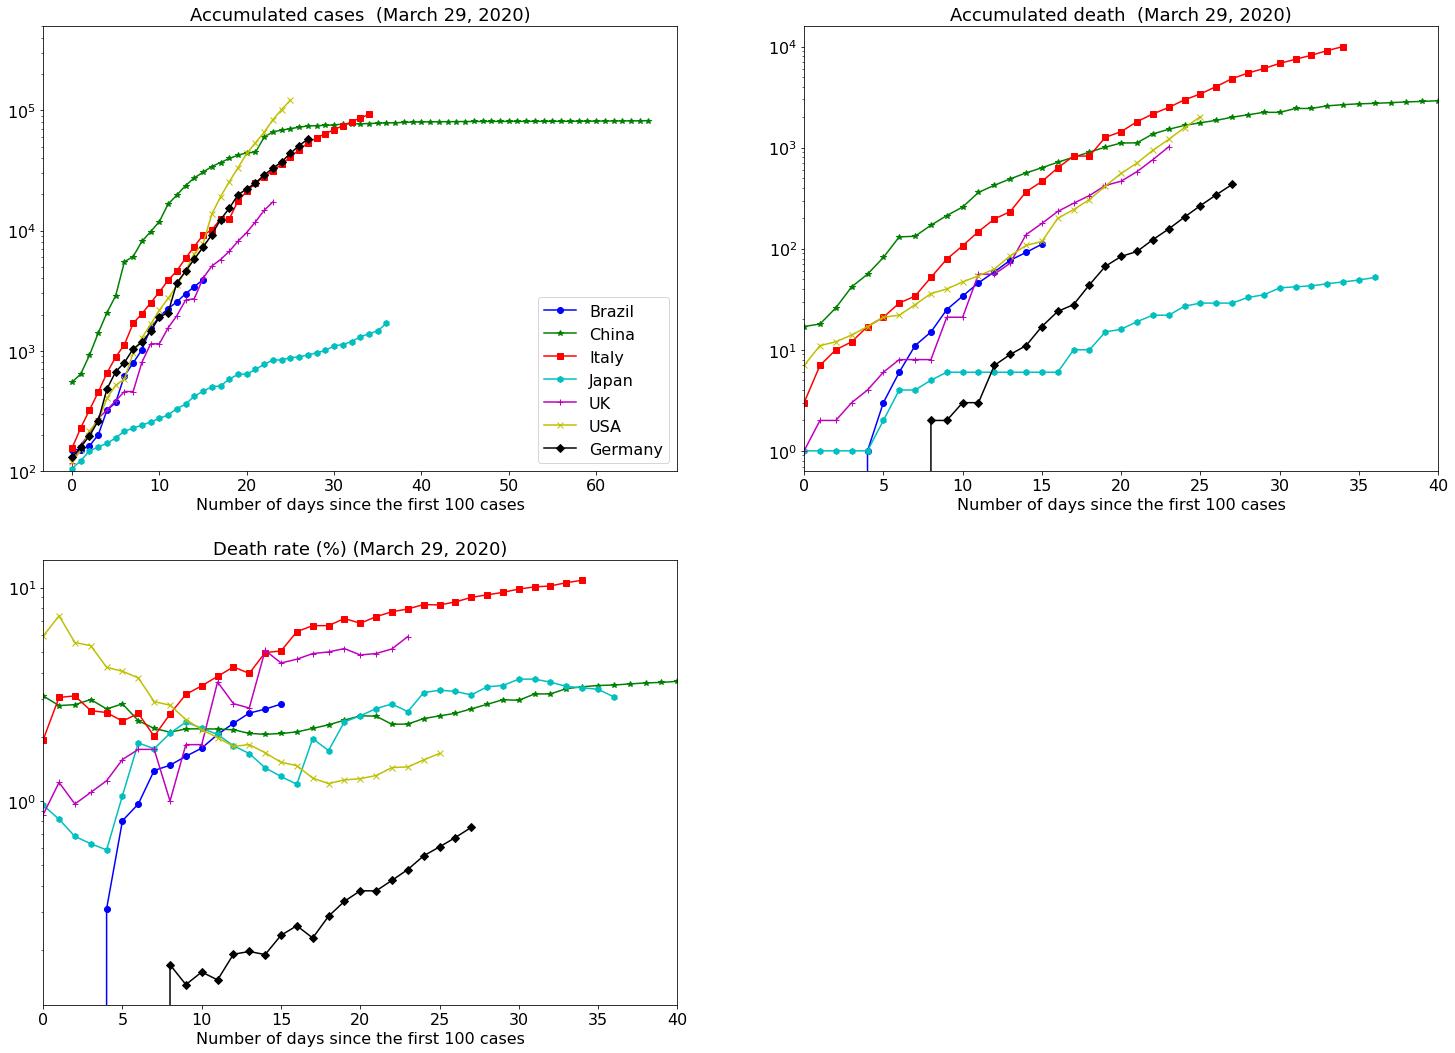

In [29]:
plt.figure(figsize=(25,18))

plt.subplot(221)
#plt.figure(figsize=(10,7))
plt.semilogy(df_brazil['deltaT'],df_brazil['Cases'],'-bo',label='Brazil')
plt.semilogy(df_china['deltaT'],df_china['Cases'],'-g*',label='China')
plt.semilogy(df_italy['deltaT'],df_italy['Cases'],'-rs',label='Italy')
plt.semilogy(df_japan['deltaT'],df_japan['Cases'],'-ch',label='Japan')
plt.semilogy(df_uk['deltaT'],df_uk['Cases'],'-m+',label='UK')
plt.semilogy(df_usa['deltaT'],df_usa['Cases'],'-yx',label='USA')
plt.semilogy(df_germany['deltaT'],df_germany['Cases'],'-kD',label='Germany')
#plt.xlim(0,40)
plt.ylim(1e02,5e05)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accumulated cases  ('+date.today().strftime("%B %d, %Y")+')',fontsize=18)
plt.xlabel('Number of days since the first 100 cases',fontsize=16)

plt.subplot(222)
#plt.figure(figsize=(10,7))
plt.semilogy(df_brazil['deltaT'],df_brazil['Deaths'],'-bo',label='Brazil')
plt.semilogy(df_china['deltaT'],df_china['Deaths'],'-g*',label='China')
plt.semilogy(df_italy['deltaT'],df_italy['Deaths'],'-rs',label='Italy')
plt.semilogy(df_japan['deltaT'],df_japan['Deaths'],'-ch',label='Japan')
plt.semilogy(df_uk['deltaT'],df_uk['Deaths'],'-m+',label='UK')
plt.semilogy(df_usa['deltaT'],df_usa['Deaths'],'-yx',label='USA')
plt.semilogy(df_germany['deltaT'],df_germany['Deaths'],'-kD',label='Germany')
plt.xlim(0,40)
#plt.ylim(1e02,5e05)
#plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Accumulated death  ('+date.today().strftime("%B %d, %Y")+')',fontsize=18)
plt.xlabel('Number of days since the first 100 cases',fontsize=16)

plt.subplot(223)
#plt.figure(figsize=(10,7))
plt.semilogy(df_brazil['deltaT'],100*df_brazil['Deaths']/df_brazil['Cases'],'-bo',label='Brazil')
plt.semilogy(df_china['deltaT'],100*df_china['Deaths']/df_china['Cases'],'-g*',label='China')
plt.semilogy(df_italy['deltaT'],100*df_italy['Deaths']/df_italy['Cases'],'-rs',label='Italy')
plt.semilogy(df_japan['deltaT'],100*df_japan['Deaths']/df_japan['Cases'],'-ch',label='Japan')
plt.semilogy(df_uk['deltaT'],100*df_uk['Deaths']/df_uk['Cases'],'-m+',label='UK')
plt.semilogy(df_usa['deltaT'],100*df_usa['Deaths']/df_usa['Cases'],'-yx',label='USA')
plt.semilogy(df_germany['deltaT'],100*df_germany['Deaths']/df_germany['Cases'],'-kD',label='Germany')
plt.xlim(0,40)
#plt.ylim(1e02,5e05)
#plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Death rate (%) ('+date.today().strftime("%B %d, %Y")+')',fontsize=18)
plt.xlabel('Number of days since the first 100 cases',fontsize=16)

plt.savefig('covid19Results/covid19.jpeg')

In [30]:
df_brazil.tail(5)

,Days,Cases,Deaths,deltaT
3/24/20,2020-03-24,2247,46,11
3/25/20,2020-03-25,2554,59,12
3/26/20,2020-03-26,2985,77,13
3/27/20,2020-03-27,3417,92,14
3/28/20,2020-03-28,3904,111,15
